To Explore Supervised Machine Learning:
===
In this task, we will try to understand supervised machine learning through regression i.e., by predicting the precentage of marks that a student is expected to score based upon the number of hours they studied. 

**This is a simple linear regression task as it involves just two variables.**

We will approach this in two way: firstly by performing linear regression from scratch using numpy and then implementing linear regression with Scikit Learn ( a much advance library for machine learning)

Part I:
---
In this part we will create an end-2-end pipeline in numpy to find the line of best fit on the relationship between the percentage of marks and number of hours a student has studied by using vanilla gradient descent. 

In [1]:
import pandas as pd # for reading csv file and data manipulation
import numpy as np # for performing scientific and mathematical operations
import matplotlib.pyplot as plt # for visualizing the relationship between data
%matplotlib inline

In [2]:
data = pd.read_csv('http://bit.ly/w-data') # read the data
data.head() # take a look at it

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**We have two quantities in our dataset we will transform in the form of numpy array**

In [3]:
x = data.Hours.values
y = data.Scores.values

x.shape, y.shape

((25,), (25,))

Now, we will try to fit a straight line based on this equation: $y = mx + c$. To do that we will first initialize slope ($m$) and intercept ($c$) as zero



In [5]:
m = 0 # initialize slope as 0
c = 0 # initialize intercept as 0

y_pred = np.zeros(x.shape) # initialize predictions scores as zero
# loop through every student study hours
for i in range(len(x)):
  # calculate the prediction value for each student and store them
  y_pred[i] = c+m*x[i]

and then, we will calculate the error between prediction and true values using sum of squares error as known also Mean Square Error (MSE):

\begin{equation*}
MSE = \frac{1}{n}\sum(y - \hat y)^2
\end{equation*}

In [7]:
error = 0 # initialize error as zero
# iterate through every prediction and true value
for i in range(len(y_pred)):
  # calculate the difference between true value and predicted value
  difference = y_pred[i] - y[i]
  # square the difference
  square = difference**2
  # append the error for every prediction
  error += square
  
# normalize it by dividing it through number of students
error /= float(len(y_pred))  

Let's take a look at the initial error:

In [8]:
error

3264.04

It's time to reduce it by using optimization algorithm, we will implement vanilla gradient descent to do so. Let's go through a single iteration step by step

In [9]:
# Hyperparameter
learning_rate = 0.0001 # how fast and slow we want to update slope and intercept

In [10]:
dc = 0 # derivate of error with respect to intercept
dm = 0 # derivate of error with respect to slope
N = float(len(x)) # number of students
# iterate through every student
for i in range(int(N)):
  x_i = x[i] # number of hour a student has studied
  y_i = y[i] # number of marks a student has scored
  y_pred_i = y_pred[i]
  dc += -(2/N) * (y_i - y_pred_i)
  dm += -(2/N) * (y_i - y_pred_i) * x_i

# update weigths
c = c - (learning_rate*dc)
m = m - (learning_rate*dm)

y_pred = np.zeros(x.shape) # initialize predictions scores as zero
# loop through every student study hours
for i in range(len(x)):
  # calculate the prediction value for each student and store them
  y_pred[i] = c+m*x[i]

error = 0 # initialize error as zero
# iterate through every prediction and true value
for i in range(len(y_pred)):
  # calculate the difference between true value and predicted value
  difference = y_pred[i] - y[i]
  # square the difference
  square = difference**2
  # append the error for every prediction
  error += square
  
# normalize it by dividing it through number of students
error /= float(len(y_pred))

Let's see if error is reduced or not

In [11]:
error

3222.699871135168

**It works, Now we can go through a number of iteration and find the line of best fit. We will create python functions to do so**

In [12]:
def initial_parameter(c, m):
  '''
  Initialize paramters for model to learn
  '''
  return c, m

def f(c, m, X):
  y = np.zeros(X.shape[0])
  for i in range(len(X)):
    y[i] = c + m*X[i]
  return y

def calculate_error(y_pred, y):
  '''
  sum of squared errors
  '''
  errors = 0
  for i in range(0, len(y_pred)):
    difference = y_pred[i]-y[i] # for every point
    square = difference**2
    errors += square
  return errors/float(len(y_pred))

def update(X, Y, c, m, learning_rate):
  dc = 0 # derivate of error with respect to intercept
  dm = 0 # derivate of error with respect to slope
  N = float(len(X))
  Y_pred = np.zeros(Y.shape)
  for i in range(int(N)):
    Y_pred[i] = c+m*X[i]
  for i in range(0, int(N)):
    x = X[i] # x-point
    y = Y[i] # y-point
    y_pre = Y_pred[i]
    dc += -(2/N) * (y-y_pre) # update dE/dc gradient
    dm += -(2/N) * x * (y-y_pre) # update dE/dm gradient
  # update weights
  c = c - (learning_rate*dc)
  m = m - (learning_rate*dm)
  return c, m

In [13]:
num_iterations = 400
learning_rate = 0.0001

for i in range(num_iterations):
  c, m = update(x, y, c, m, learning_rate)
  y_pred = f(c, m, x)
  error = calculate_error(y_pred, y)
  print("Iteration: %d, error: %0.5f" % (i, error))

Iteration: 0, error: 3181.88803
Iteration: 1, error: 3141.59772
Iteration: 2, error: 3101.82228
Iteration: 3, error: 3062.55513
Iteration: 4, error: 3023.78977
Iteration: 5, error: 2985.51980
Iteration: 6, error: 2947.73888
Iteration: 7, error: 2910.44076
Iteration: 8, error: 2873.61928
Iteration: 9, error: 2837.26833
Iteration: 10, error: 2801.38192
Iteration: 11, error: 2765.95409
Iteration: 12, error: 2730.97900
Iteration: 13, error: 2696.45085
Iteration: 14, error: 2662.36394
Iteration: 15, error: 2628.71263
Iteration: 16, error: 2595.49135
Iteration: 17, error: 2562.69460
Iteration: 18, error: 2530.31696
Iteration: 19, error: 2498.35307
Iteration: 20, error: 2466.79765
Iteration: 21, error: 2435.64547
Iteration: 22, error: 2404.89139
Iteration: 23, error: 2374.53032
Iteration: 24, error: 2344.55723
Iteration: 25, error: 2314.96717
Iteration: 26, error: 2285.75523
Iteration: 27, error: 2256.91660
Iteration: 28, error: 2228.44649
Iteration: 29, error: 2200.34021
Iteration: 30, error

As, we can see that MSE started from 3181.88803 and reduced to 47.65355. Let's take a look at the value of intercept and slope

In [14]:
print(c, m)

1.4929174055007548 9.163594975899898


We can further plot the line to see if it fits to the points

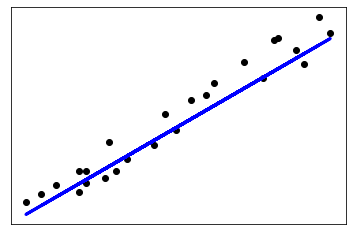

In [15]:
pred = f(c, m, x)
plt.scatter(x, y, color='black')
plt.plot(x, pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show();

Let's try to calculate a sample student marks 

In [17]:
hours = 9.25
marks = c+m*hours
print("A student studied for ", hours, "and his/her predicted marks are ", marks)

A student studied for  9.25 and his/her predicted marks are  86.2561709325748


Part 2: With Scikit-Learn library
===

In this section, we can simply use scikit learn library to perform linear regression with a two lines of code

Coefficients: 
 [9.07867315]
Mean squared error: 107.55
Coefficient of determination: 0.83


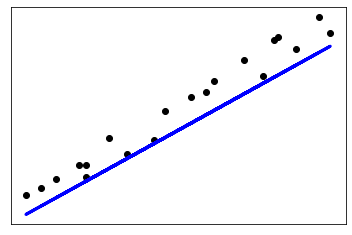

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the student dataset
data = pd.read_csv('http://bit.ly/w-data') # read the data

X = data.Hours.values
Y = data.Scores.values

# Split the data into training/testing sets
X_train = X[:-20].reshape(-1, 1)
X_test = X[-20:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = Y[:-20]
y_test = Y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [18]:
# sample student score
hours = np.array([9.25])
marks = regr.predict(hours.reshape(1, -1))
print("A student studied for ", hours[0], "and his/her predicted marks are ", marks[0])

A student studied for  9.25 and his/her predicted marks are  82.57897707537339
